## 目的

了解数据，熟悉数据，为后续的特征工程做准备

1. EDA价值主要在于熟悉了解整个数据集的基本情况（缺失值，异常值），对数据集进行验证是否可以进行接下来的机器学习或者深度学习建模.

2. 了解变量间的相互关系、变量与预测值之间的存在关系。

3. 为特征工程做准备

In [2]:
# 导入数据分析及可视化过程需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

In [3]:
# 读取文件
data_train = pd.read_csv('../train.csv')
data_test_a = pd.read_csv('../testA.csv')

In [4]:
# 总体了解
data_test_a.shape

(200000, 46)

In [5]:
data_train.shape

(800000, 47)

In [6]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [7]:
# 熟悉数据类型
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
# 总体粗略的查看数据集各个特征的一些基本统计量
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [9]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [10]:
# 查看缺失值
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [11]:
# 查看缺失特征中缺失率大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

fea_null_moreThanHalf

{}

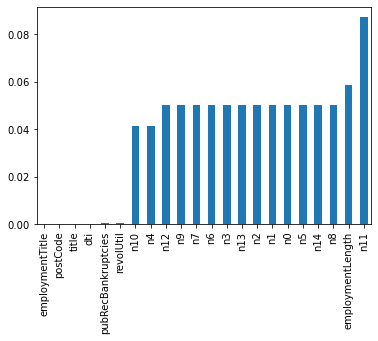

In [12]:
# 具体的查看缺失特征及缺失率
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [13]:
# 查看训练集测试集中特征属性只有一值的特征
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [14]:
one_value_fea

['policyCode']

In [15]:
one_value_fea_test

['policyCode']

In [16]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


In [17]:
# 查看特征的数值类型有哪些，对象类型有哪些
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [18]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [19]:
data_train.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

In [20]:
# 划分数值型变量中的连续变量和离散型变量
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [21]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [22]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [23]:
# 数值类别型变量分析
# 离散型变量
data_train['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [24]:
#离散型变量
data_train['homeOwnership'].value_counts()

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [25]:
data_train['verificationStatus'].value_counts()#离散型变量

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [26]:
data_train['initialListStatus'].value_counts()#离散型变量

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [27]:
data_train['applicationType'].value_counts()#离散型变量

0    784586
1     15414
Name: applicationType, dtype: int64

In [28]:
data_train['policyCode'].value_counts()#离散型变量，无用，全部一个值

1.0    800000
Name: policyCode, dtype: int64

In [29]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [30]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

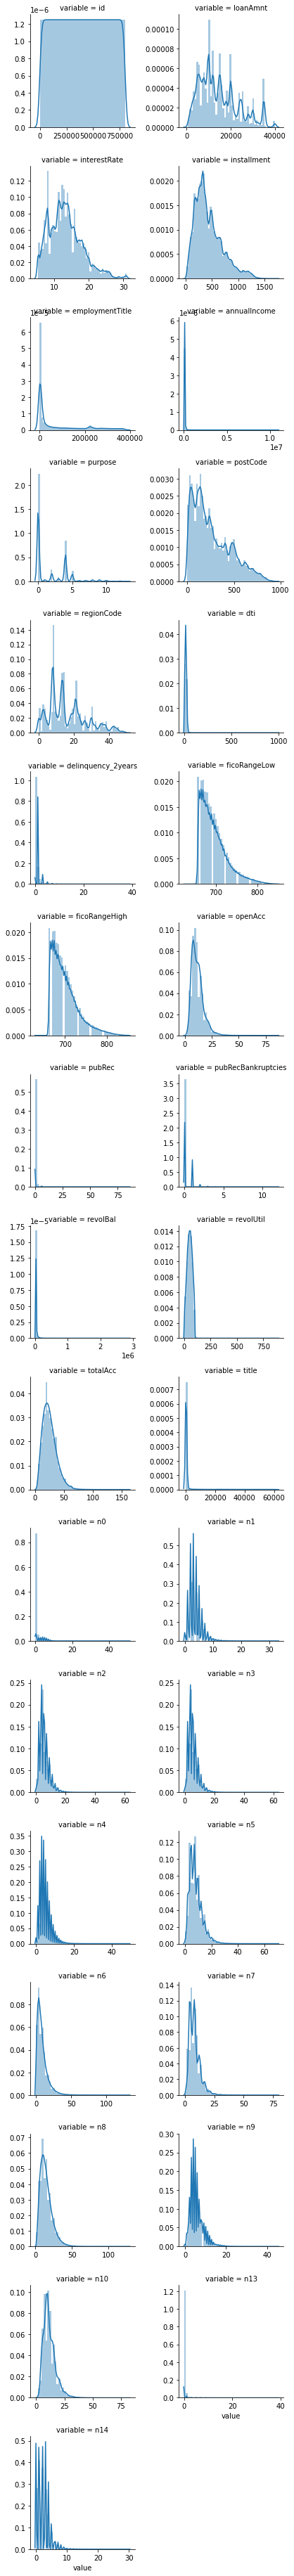

In [31]:
# 数值连续型变量分析
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Text(0, 0.5, 'Probability')

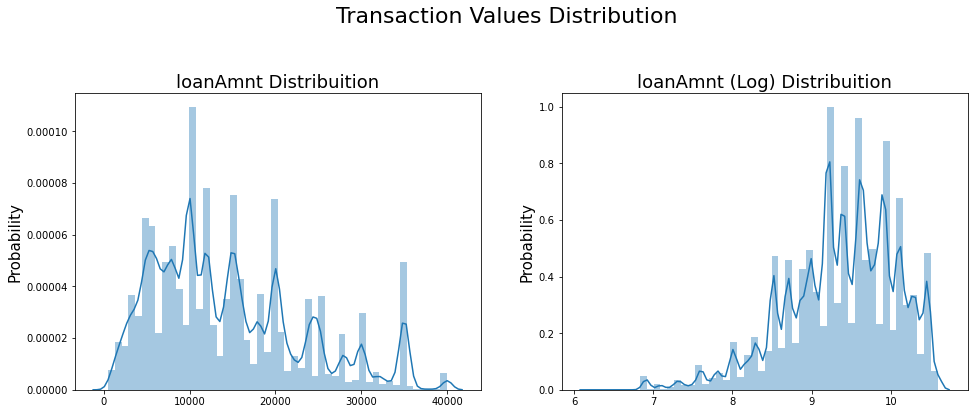

In [32]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

# Text(0, 0.5, 'Probability')

In [33]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [34]:
# 非数值类别型变量分析
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [35]:
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [36]:
data_train['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [37]:
data_train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [38]:
data_train['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [39]:
data_train['earliesCreditLine'].value_counts()

Aug-2001    5567
Aug-2002    5403
Sep-2003    5403
Oct-2001    5258
Aug-2000    5246
            ... 
May-1960       1
Jun-1958       1
Oct-2015       1
Mar-1962       1
Sep-1957       1
Name: earliesCreditLine, Length: 720, dtype: int64

In [40]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

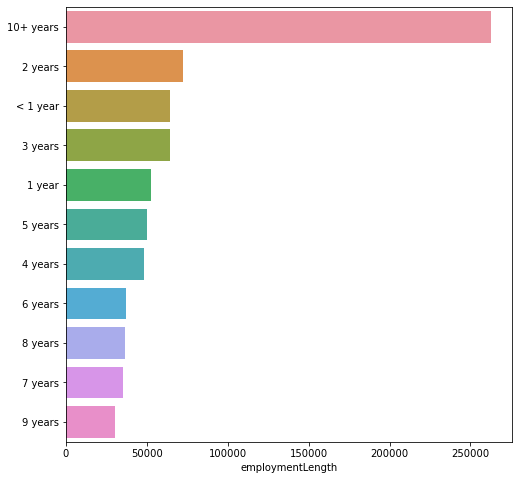

In [41]:
# 变量分布可视化
# 单一变量分布可视化
plt.figure(figsize=(8, 8))
sns.barplot(data_train["employmentLength"].value_counts(dropna=False)[:20],
            data_train["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

In [42]:
# 根绝y值不同可视化x某个特征的分布
# 首先查看类别型变量在不同y值上的分布
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

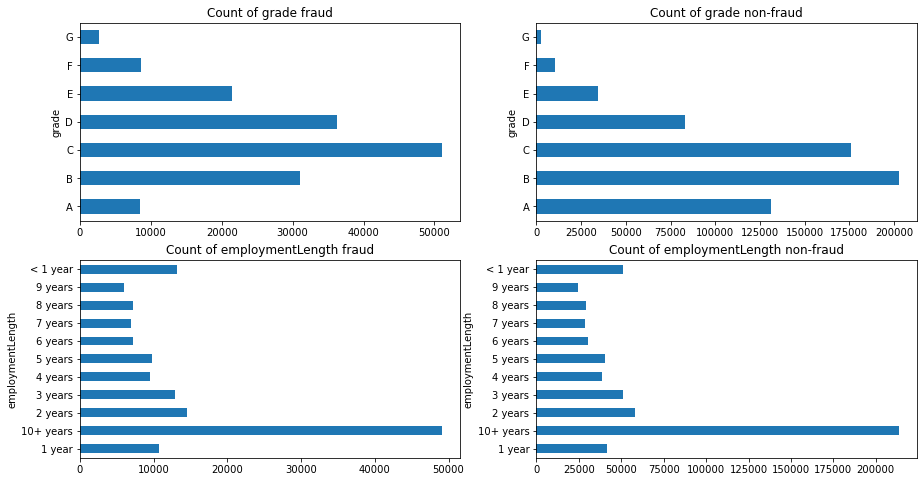

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

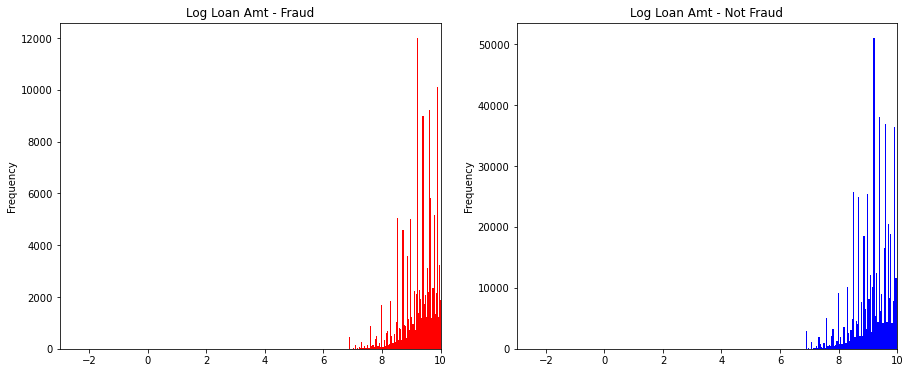

In [44]:
# 其次查看连续型变量在不同y值上的分布
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

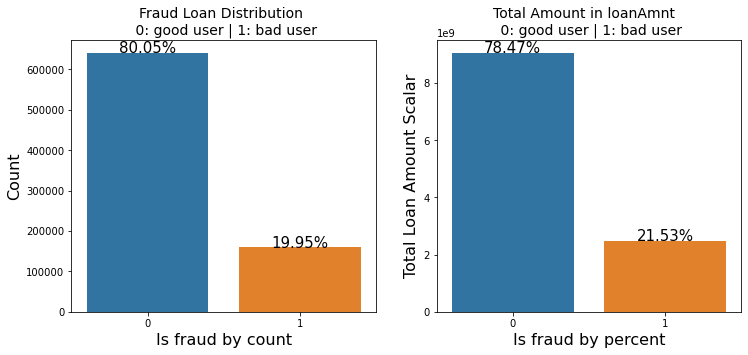

In [45]:
total = len(data_train)
total_amt = data_train.groupby(['isDefault'])['loanAmnt'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)     

In [46]:
# 时间格式数据处理及查看
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [47]:
# 转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

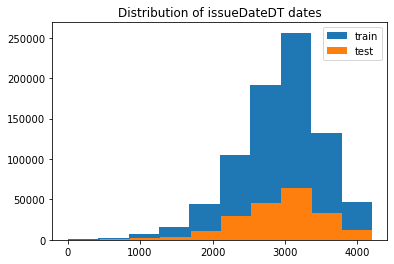

In [48]:
plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

In [49]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)

In [50]:
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                           ...                          \
issueDateDT      214       245       274   ...        3926        3957   
grade                                      ...                           
A            168825.0   85600.0  101825.0  ...  13093850.0  11757325.0   
B            303175.0  434425.0  538450.0  ...  16863100.0  17275175.0   
C            151100.0  243725.0  393150.0  ...  17502375.0  17471500.0   
D            171325.0  192900.0  269325.0  ...  11403075.0  10964150.0   
E            116450.0   42000.0  139775.0  ...   3983050.0   3410125.0   
F             49000.0   27000.0   43000.0  ...   1074175.0    868925.0   
G             24625.0       NaN       NaN  ...     56100.0    243275.0   

                                                                       \
issueDateDT        3987        4018        4048       4079       4110   
grade                                                                   
A            11945975.0   9144000.0   7977650.0  6888900.0  5109800.0   
B            16217500.0  11431350.0   8967750.0  7572725.0  4884600.0   
C            16111225.0  11973675.0  10184450.0  7765000.0  5354450.0   
D            10747675.0   7082050.0   7189625.0  5195700.0  3455175.0   
E             3107150.0   2341825.0   2225675.0  1643675.0  1091025.0   
F              761675.0    685325.0    665750.0   685200.0   316700.0   
G              224825.0     64050.0    198575.0   245825.0    53125.0   

                                              
issueDateDT       4140       4171       4201  
grade                                         
A            3919275.0  2694025.0  2245625.0  
B            4329400.0  3922575.0  3257100.0  
C            4552600.0  2870050.0  2246250.0  
D            3038500.0  2452375.0  1771750.0  
E            1131625.0   883950.0   802425.0  
F             315075.0    72300.0        NaN  
G              23750.0    25100.0     1000.0  

[7 rows x 139 columns]

In [53]:
import pandas_profiling

In [54]:
pfr = pandas_profiling.ProfileReport(data_train)
pfr.to_file("./example.html")

TypeError: concat() got an unexpected keyword argument 'join_axes'